In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

1a) The transition matrix will be:

$$P = \begin{bmatrix}
0.2 & 0.7 & 0.1\\
0.2 & 0.5 & 0.3\\
0.2 & 0.4 & 0.4
\end{bmatrix}$$

1b)

In [2]:
np.random.seed(42)

In [3]:
# Set up the transition matrix and possible states
P = np.array([[0.2, 0.7, 0.1],[0.2, 0.5, 0.3], [0.2, 0.4, 0.4]])
state = [1, 2, 3]

# Give a starting state and simulate one step forward
X_0 = np.array([1, 0, 0])
X_1 = np.random.choice(state, p = X_0 @ P)
X_1

2

2a) We want to solve $(P^T-I_3)\pi_{\infty}=0$
,which gives us:

$$\begin{bmatrix}
-0.8 & 0.2 & 0.2\\
0.7 & -0.5 & 0.4\\
0.1 & 0.3 & -0.6
\end{bmatrix} \begin{bmatrix}
a\\
b\\
c
\end{bmatrix}=\begin{bmatrix}
0\\
0\\
0
\end{bmatrix}.
$$

Solving this system gives us, $b = \frac{23a}{9}$ and $c=\frac{13a}{9}$. The value $a = \frac{1}{1+\frac{23}{9} + \frac{13}{9}}$ will make sure the vector $\pi_{\infty}$ sums to 1.

In [4]:
# We can find the null space of P.T - I and normalize the vector
pi_inf = sp.linalg.null_space(P.T - np.identity(3))
pi_inf = pi_inf / np.sum(pi_inf)
print(np.ndarray.flatten(pi_inf))

# Or we can use the values we obtained theoretically (gives the exact same result)
a = (1 / (1 + 23/9 + 13/9))
b = a * (23/9)
c = a * (13/9)
pi_inf = np.array([a, b, c])
print(pi_inf)

[0.2        0.51111111 0.28888889]
[0.2        0.51111111 0.28888889]


2b) The initial distribution did not seem to affect the rate of convergence to the stationary state. It would always take a few iterations to basically reach it.  

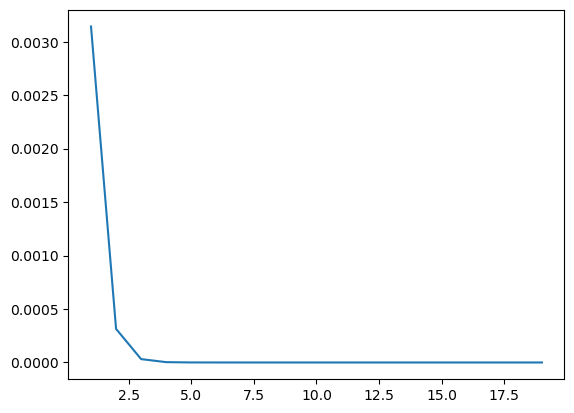

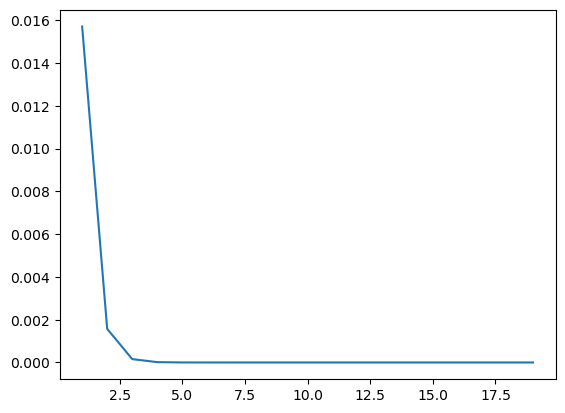

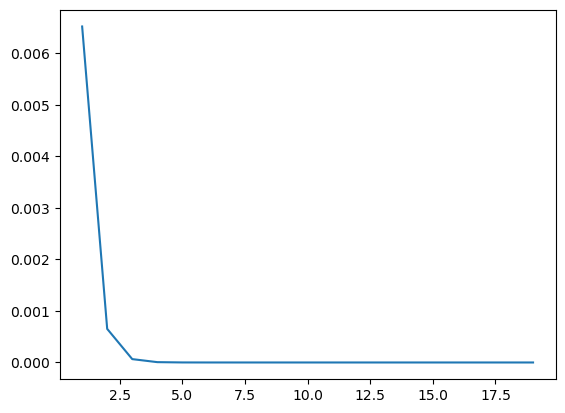

In [5]:
def markov_process(X_0, n = 20):
    
    # record the state distribution and L2 norm
    X = []
    diff = np.zeros(n)
    X_i = X_0
    
    #iterate through
    for i in range(n):
        X_i = X_i @ P
        X.append(X_i)
        diff[i] = np.sqrt(np.sum(np.square(X_i - pi_inf)))
    
    return(X, diff)

# Start at any state with equal probability
X_0 = [1/3, 1/3, 1/3]
pi_1, diff_1 = markov_process(X_0)

plt.plot(range(1, 20), diff_1[1:20])
plt.show()

# Start at the third state 
X_0 = [0, 0, 1]
pi_2, diff_2 = markov_process(X_0)

plt.plot(range(1, 20), diff_2[1:20])
plt.show()

# Start at the second or third state 
X_0 = [0, 0.65, 0.35]
pi_3, diff_3 = markov_process(X_0)

plt.plot(range(1, 20), diff_3[1:20])
plt.show()

3a) Starting at state 1, on average, it takes 4.63 steps to reach state 3 for the first time. Starting at state 2, on average, it takes 3.81 steps to reach state 3 for the first time.

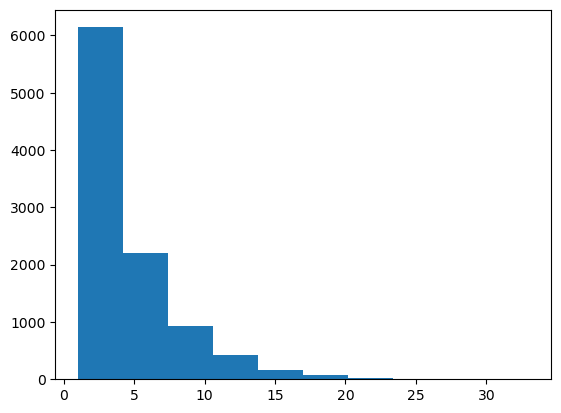

Average starting at state 1: 4.6497


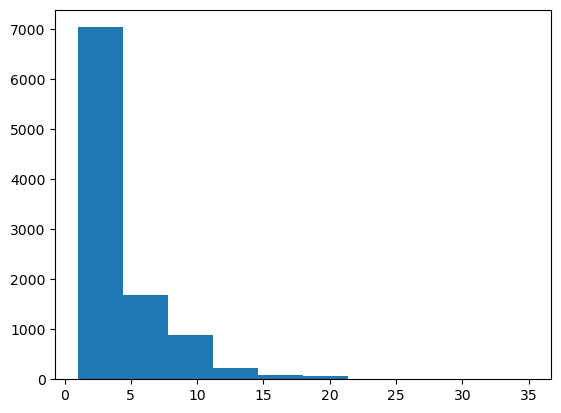

Average starting at state 2: 3.8228


In [6]:

def start_at(start):
    # record the steps
    steps = []
    
    # Create a large sample
    for sample in range(10000):
        
        # set the starting step
        X_0 = np.zeros(3)
        X_0[start - 1] = 1
        num_steps = 1
        
        # Iteratively choose next step until we reach state 3
        X_i = np.random.choice(state, p = X_0 @ P)
        while X_i != 3:
            at_state = np.zeros(3)
            at_state[X_i - 1] = 1
            X_i = np.random.choice(state, p = at_state @ P)
            num_steps += 1
            
        steps.append(num_steps)
        
    return steps

steps = start_at(1)
plt.hist(steps)
plt.show()
print("Average starting at state 1:", np.mean(steps))

steps = start_at(2)
plt.hist(steps)
plt.show()
print("Average starting at state 2:", np.mean(steps))
    

3b)

Let $T_i$ denote the random variable of the arrival time to the absorbing state, $3$, given starting at $X_0 = i$. Note that $T_3 = 0$. We have that 

$$E[T_1] = 1 + p_{11}*E[T_1] + p_{12}*E[T_2]$$

and

$$E[T_2] = 1 + p_{21}*E[T_1] + p_{22}*E[T_2].$$

Solving for $E[T_1]$ gives us $E[T_1] = \frac{1 + p_{12}*E[T_2]}{1 - p_{11}}$. Plugging this into the second equation, 

$$E[T_2] = 1 + p_{21}*\frac{1 + p_{12}*E[T_2]}{1 - p_{11}} + p_{22}*E[T_2]$$

$$=1 + \frac{p_{21}}{1 - p_{11}} + p_{21}*\frac{p_{12}*E[T_2]}{1 - p_{11}} + p_{22}*E[T_2]$$

$$= 1 + \frac{p_{21}}{1 - p_{11}} + (p_{21}*\frac{p_{12}}{1 - p_{11}} + p_{22})*E[T_2]$$

So $E[T_2] = \frac{1 + \frac{p_{21}}{1 - p_{11}}} {(1 - p_{21}*\frac{p_{12}}{1 - p_{11}} + p_{22})} =  \frac{1 + \frac{0.2}{0.8}} {(1 - 0.2*\frac{0.7}{0.8} + 0.5)} \approx 3.846$. Which gives us $E[T] = \frac{1 + p_{12}*E[T_2]}{1 - p_{11}} = \frac{1 + 0.7*3.846}{0.8} \approx 4.615$. Observe these are close to the values we got from running the simulation.